##### Вариант 10
##### Анализ деятельности предприятий легкой промышленности
###### Имеются данные обследования 20 предприятий легкой промышленности по следующим характерным признакам:
###### Х1 - уровень фондоотдачи;
###### Х2 - трудоемкость единицы продукции;
###### Х3 - удельный вес закупочных материалов в общих расходах;
###### Х4 - коэффициент сменности оборудования;
###### Х5 - премии и вознаграждения на одного работника;
###### X6 - удельный вес потерь от брака;
###### Х7 - среднегодовая стоимость основных производственных фондов;
###### Х8 - среднегодовой фонд заработной платы;
###### Х9 - уровень реализуемости продукции;
###### Х10 - индекс постоянного актива (отношение основных средств и прочих внеоборотных активов к собственным сред ствам);
###### Х11 - оборачиваемость оборотных средств;
###### Х12 - непроизводственные расходы.
##### Задача
###### В соответствии с номером варианта выбрать наблюдения нужных переменных, провести факторный анализ, выявить и интерпретировать факторные признаки, указать наиболее благополучные и перспективные предприятия. Моему номеру варианта соответствуют: 1, 3, 4, 5, 6, 8, 9, 10

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('2.1.8. Данные для д.з. №4.xls')
data = data.iloc[5:25, 1:14]  
data.columns = ['номер предприятия', 'х1', 'х2', 'х3', 'х4', 'х5', 'х6', 'х7', 'х8', 'х9', 'х10', 'х11', 'х12'] 
data = data.set_index('номер предприятия') 
data.tail()

,х1,х2,х3,х4,х5,х6,х7,х8,х9,х10,х11,х12
номер предприятия,,,,,,,,,,,,
16,1.54,0.51,0.2,1.47,0.24,0.23,17.16,11238,0.62,0.74,153,30.53
17,1.6,0.16,0.08,1.87,4.44,0.16,222.11,43799,0.82,0.81,155.52,12.39
18,1.4,0.27,0.37,1.27,1,0.16,59.4,18452,0.65,0.64,79.92,26.05
19,1.12,0.01,0.35,1.5,1.27,0.15,391.27,7888,0.84,0.51,84.6,17.26
20,1.22,0.42,0.26,1.09,0.54,0.1,48.41,20122,0.69,0.67,138.24,22.26


In [4]:
selected_columns = ['х1', 'х3', 'х4', 'х5', 'х6', 'х8', 'х9', 'х10']
data_selected = data[selected_columns]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)


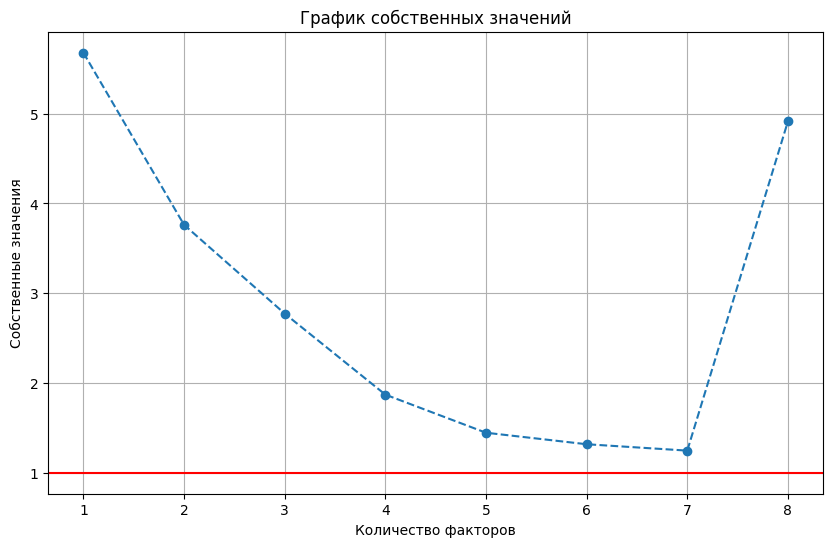

In [5]:
n_factors = range(1, len(selected_columns) + 1)
eigenvalues = []

for n in n_factors:
    fa = FactorAnalysis(n_components=n)
    fa.fit(data_scaled)
    eigenvalues.append(np.sum(fa.noise_variance_))

plt.figure(figsize=(10, 6))
plt.plot(n_factors, eigenvalues, marker='o', linestyle='--')
plt.title('График собственных значений')
plt.xlabel('Количество факторов')
plt.ylabel('Собственные значения')
plt.xticks(n_factors)
plt.axhline(y=1, color='r', linestyle='-')  
plt.grid()
plt.show()

In [14]:
selected_columns = ['х1', 'х3', 'х4', 'х5', 'х6', 'х8', 'х9', 'х10']
data_selected = data[selected_columns]
fa = FactorAnalysis(n_components=4) 
fa.fit(data_selected)
loadings = fa.components_.T
loadings_df = pd.DataFrame(loadings, columns=[f'Фактор {i+1}' for i in range(loadings.shape[1])], index=selected_columns)
loadings_df

,Фактор 1,Фактор 2,Фактор 3,Фактор 4
х1,-0.157762,0.301641,-0.053923,0.003636
х3,-0.006678,0.037359,-0.071709,0.047715
х4,0.037400,-0.015570,0.123037,0.008065
х5,0.347831,0.244340,0.705303,-0.116841
х6,0.054769,0.058219,-0.075067,0.100063
х8,20594.837426,0.000562,-0.000536,0.000015
х9,0.010335,0.001706,0.034409,0.040797
х10,-0.064010,0.116770,-0.018208,0.001063


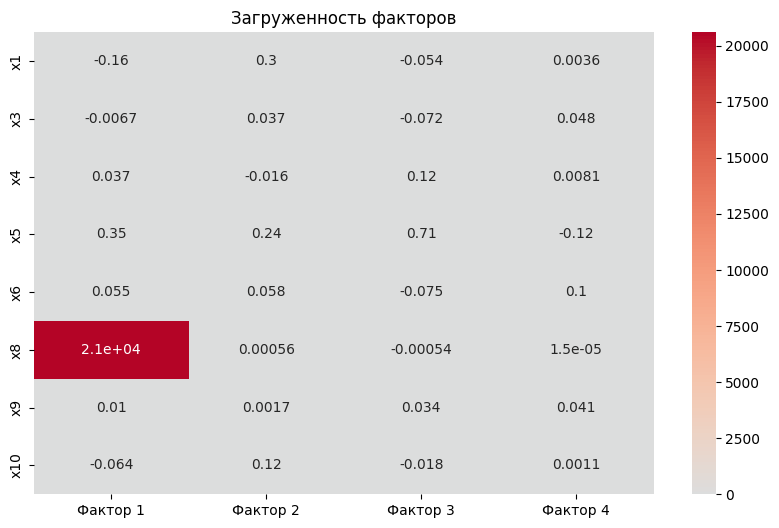

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Загруженность факторов')
plt.show()

##### Фактор 1:
###### х5 (премии и вознаграждения на одного работника) имеет наибольшую положительную загрузку (0.3478), что указывает на то, что этот фактор сильно связан с премиями и вознаграждениями.
###### х1 (уровень фондоотдачи) и х3 (удельный вес закупочных материалов) имеют отрицательные значения => предприятия с высокими премиями имеют более низкий уровень фондоотдачи и закупочных материалов.
##### Фактор 2:
###### х1 (уровень фондоотдачи) и х4 (коэффициент сменности оборудования) имеют положительные значения, что может указывать на то, что предприятия с высоким уровнем фондоотдачи также имеют высокий коэффициент сменности оборудования.
###### х5 и х6 имеют небольшие значения.
##### Фактор 3:
###### х5 имеет наибольшую положительную загрузку (0.7053), что указывает на сильную связь с премиями и вознаграждениями.
###### х4 также имеет положительное значение, что может указывать на связь между премиями и коэффициентом сменности оборудования.
##### Фактор 4:
###### Фактор не имеет значительного влияния на анализируемые переменные.

In [17]:
fa.fit(data_selected)
factors = fa.transform(data_selected)
data_selected['Фактор 1'] = factors[:, 0]
data_selected['Фактор 2'] = factors[:, 1]
data_selected['Фактор 3'] = factors[:, 2]
data_selected['Фактор 4'] = factors[:, 3]

In [19]:
abs_loadings = loadings_df.abs()
mean_loadings = abs_loadings.mean()

weights = mean_loadings / mean_loadings.sum()

weights

Фактор 1    0.999894
Фактор 2    0.000038
Фактор 3    0.000053
Фактор 4    0.000015
dtype: float64

In [22]:

data_selected['Общий балл'] = (data_selected['Фактор 1'] * weights['Фактор 1'] +
                               data_selected['Фактор 2'] * weights['Фактор 2'] +
                               data_selected['Фактор 3'] * weights['Фактор 3'] +
                               data_selected['Фактор 4'] * weights['Фактор 4'])


top_enterprises = data_selected.sort_values(by='Общий балл', ascending=False)


print("Наиболее успешные предприятия:")
print(top_enterprises[['Общий балл']].head(5))  

Наиболее успешные предприятия:
                   Общий балл
номер предприятия            
12                   3.231923
7                    1.496231
17                   0.760987
9                    0.559259
10                   0.539896
